# ¡Hola Fercho! 😊

Mi nombre es **Alejandro Castellanos** y hoy tengo el placer de ser el revisor de tu proyecto.

Voy a revisar todo tu código con detalle, buscando tanto los puntos fuertes como aquellos en los que podrías mejorar. Te dejaré comentarios a lo largo del notebook, destacando lo que has hecho bien y sugiriendo ajustes donde sea necesario. Si encuentro algún error, no te preocupes, te lo haré saber de forma clara y te daré información útil para que puedas corregirlo en la próxima iteración. Si en algún punto tienes comentarios, siéntete libre de dejarlos también.


Encontrarás mis comentarios específicos dentro de cajas verdes, amarillas o rojas, es muy importante que no muevas, modifiques o borres mis comentarios, con el fin de tener un seguimiento adecuado de tu proceso:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

A continuación te dejaré un comentario general con mi valoración del proyecto. **¡Mi objetivo es que sigas aprendiendo y mejorando con cada paso!**


-------------

<div class="alert alert-block alert-success">
<b>Comentario General del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Fercho, tu análisis muestra una buena comprensión del manejo de datos y los primeros pasos en la exploración de los mismos, destacando especialmente en el uso de visualizaciones y pruebas estadísticas. Has aplicado transformaciones adecuadas y herramientas estadísticas clave que le dan solidez a tu trabajo. 

Aun así, es importante que revises el tratamiento que diste a los valores faltantes, particularmente en la columna *user_score*, ya que reemplazarlos por ceros puede generar distorsiones en el análisis estadístico. Acá te comparto un artículo donde hablan sobre diferentes [métodos de manejo de datos faltanes](https://www.kaggle.com/code/parulpandey/a-guide-to-handling-missing-values-in-python) que seguro te serán útiles en futuros proyectos.

También sería útil prestar más atención a la organización del notebook y a cómo se presentan visualmente los datos, para facilitar tanto la lectura como la interpretación. 

Vas por buen camino, solo recuerda que cuidar estos detalles te permitirá sacar mejores conclusiones y mostrar tu trabajo con más claridad.

¡Te deseo muchos éxitos en tu próximo Sprint! 🚀

*Estado del Proyecto:* **Aprobado**
</div>

--------------------

# ANÁLISIS DE VIDEOJUEGOS - PROYECTO INTEGRADO

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import levene, ttest_ind

In [2]:
games = pd.read_csv('/datasets/games.csv')

### Paso 1: Visualisacion del Dataframe

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
print(games.head())

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Muy buen trabajo importando las librerías y los datos del proyecto. Adicionalmente usaste correctamente las funciones `info` y `head`, esto te permite hacer una primera revisión de los datos, su estructura y contenido. 

</div>

## Paso 2: Limpieza y corrección del tipo de datos.

##### Remplazar los nombres de las columnas a minúsculas.

In [5]:
lowers = []
for encabezados in games.columns:
    name_lower = encabezados.lower()
    lowers.append(name_lower)
games.columns = lowers

In [6]:
print(games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


##### Convertir los datos.

In [7]:
games['year_of_release'] = games['year_of_release'].astype('Int64')
games['user_score'] = games['user_score'].replace('tbd', np.nan)
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')
games['user_score'] = games['user_score'].astype('Float64')
games['user_score'] = games['user_score'].fillna(0)

In [8]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       16715 non-null  Float64
 10  rating           9949 non-null   object 
dtypes: Float64(1), Int64(1), float64(5), object(4)
memory usage: 1.4+ MB


Cambie estos datos porque en la columna year_of_release contiene años y en el formato float no representa nada porque no hay años con decimal y en la columna critic_score solo tiene valores enteros no hace ninguna diferencia que tenga el tipo float.

Decidí no modificar los datos faltantes, ya que no sabemos cómo voy a utilizar los datos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Has realizado una transformación adecuada de los nombres de las columnas a minúsculas, lo que mejora la consistencia en el manejo del DataFrame y has convertido correctamente el tipo de las columnas

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Como recomendación, sería más útil mantener los valores nulos (`NaN`) en *user_score* si se planea analizarlos posteriormente, en lugar de sustituirlos por ceros, ya que esto puede distorsionar estadísticas.

</div>
</div>

##### Ventas totales por plataforma.

In [9]:
games['ventas_totales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales'] 

In [10]:
print('Ventas totales de la plataforma', games['ventas_totales'])

Ventas totales de la plataforma 0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: ventas_totales, Length: 16715, dtype: float64


## Paso 3: Análisis de datos.

#### Juegos lanzados por año.

In [11]:
games_year = games['year_of_release'].value_counts().sort_index()
print('JUegos lanzados por año')
print()
print(games_year)

JUegos lanzados por año

1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: Int64


#### Ventas por plataforma.

In [12]:
ventas_por_plataforma = games.groupby('platform')['ventas_totales'].sum().sort_values(ascending=False)
print(ventas_por_plataforma)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: ventas_totales, dtype: float64


<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Los valores son correctos. Sin embargo, recuerda que los seres humanos somos principalmente visuales. Por lo tanto, cuando manejes este tipo de información, una buena práctica es acompañarla de una gráfica. Esto facilita el estudio y el análisis de los datos.

</div>

#### Filtros y visualización para saber las plataformas con más ventas.

In [13]:
plataformas_con_mas_ventas = ventas_por_plataforma.head(8).index.tolist()
print(plataformas_con_mas_ventas)

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4']


In [14]:
#filtro dde datos
juegos_plat = games[games['platform'].isin(plataformas_con_mas_ventas)]
ventas_plat_año = juegos_plat.groupby(['year_of_release', 'platform'])['ventas_totales'].sum().unstack(fill_value=0)
print(ventas_plat_año)

platform             DS    GBA      PS     PS2     PS3     PS4     Wii    X360
year_of_release                                                               
1985               0.02   0.00    0.00    0.00    0.00    0.00    0.00    0.00
1994               0.00   0.00    6.03    0.00    0.00    0.00    0.00    0.00
1995               0.00   0.00   35.96    0.00    0.00    0.00    0.00    0.00
1996               0.00   0.00   94.70    0.00    0.00    0.00    0.00    0.00
1997               0.00   0.00  136.17    0.00    0.00    0.00    0.00    0.00
1998               0.00   0.00  169.49    0.00    0.00    0.00    0.00    0.00
1999               0.00   0.00  144.53    0.00    0.00    0.00    0.00    0.00
2000               0.00   0.07   96.37   39.17    0.00    0.00    0.00    0.00
2001               0.00  61.53   35.59  166.43    0.00    0.00    0.00    0.00
2002               0.00  74.16    6.67  205.38    0.00    0.00    0.00    0.00
2003               0.00  56.67    2.07  184.31    0.

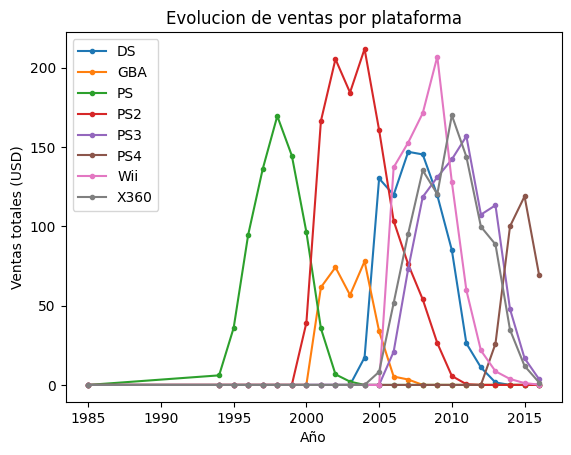

In [15]:
ventas_plat_año.plot(marker='.')
plt.title('Evolucion de ventas por plataforma')
plt.xlabel('Año')
plt.ylabel('Ventas totales (USD)')
plt.legend()
plt.show()

#### Determinar el mejor período para el análisis.

In [16]:
def vida_de_plataforma(platform_name):
    data = ventas_plat_año[platform_name]
    data_cero = data[data > 0]
    if len(data_cero) > 0:
        primer_año = data_cero.index.min()
        ultimo_año = data_cero.index.max()
        mejor_año = data_cero.idxmax()
        mejores_ventas = data_cero.max()
        print(f"""Análisis de {platform_name}:
Primer año de ventas: {primer_año}
Último año de venta: {ultimo_año}
Mejor año de venta: {mejor_año}
Mejores ventas: {mejores_ventas:.2f} millones""")
    else:
        print(f'No hay datos de ventas para {platform_name}') 

In [17]:
vida_de_plataforma('DS')
vida_de_plataforma('GBA')
vida_de_plataforma('PS')
vida_de_plataforma('PS2')
vida_de_plataforma('PS3')
vida_de_plataforma('PS4')
vida_de_plataforma('Wii')
vida_de_plataforma('X360')

Análisis de DS:
Primer año de ventas: 1985
Último año de venta: 2013
Mejor año de venta: 2007
Mejores ventas: 146.94 millones
Análisis de GBA:
Primer año de ventas: 2000
Último año de venta: 2007
Mejor año de venta: 2004
Mejores ventas: 77.91 millones
Análisis de PS:
Primer año de ventas: 1994
Último año de venta: 2003
Mejor año de venta: 1998
Mejores ventas: 169.49 millones
Análisis de PS2:
Primer año de ventas: 2000
Último año de venta: 2011
Mejor año de venta: 2004
Mejores ventas: 211.81 millones
Análisis de PS3:
Primer año de ventas: 2006
Último año de venta: 2016
Mejor año de venta: 2011
Mejores ventas: 156.78 millones
Análisis de PS4:
Primer año de ventas: 2013
Último año de venta: 2016
Mejor año de venta: 2015
Mejores ventas: 118.90 millones
Análisis de Wii:
Primer año de ventas: 2006
Último año de venta: 2016
Mejor año de venta: 2009
Mejores ventas: 206.97 millones
Análisis de X360:
Primer año de ventas: 2005
Último año de venta: 2016
Mejor año de venta: 2010
Mejores ventas: 17

Decidí visualizar el número de juegos por año para decidir en qué periodo hay datos más relevantes.

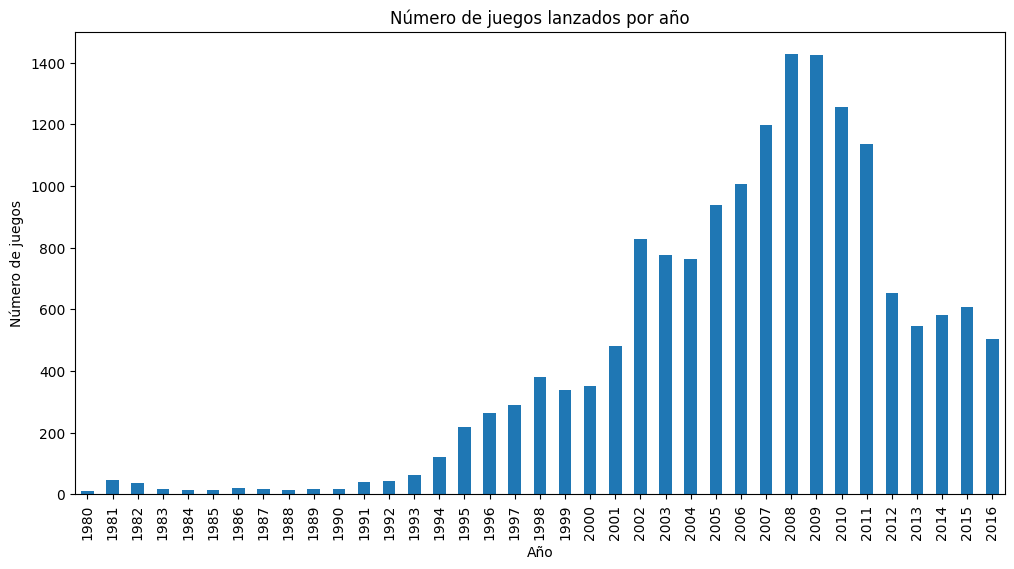

In [18]:
games_year.plot(kind='bar', figsize=(12, 6))
plt.title('Número de juegos lanzados por año')
plt.xlabel('Año')
plt.ylabel('Número de juegos')
plt.show()

Los datos nos indican que hay un pico en la compra durante los años 2008 y 2009, pero estos datos son muy antiguos para ser relevantes para nuestro análisis. Decidí usar el período de los tres últimos años como base para mi análisis.

#### Crear un nuevo Dataframe para el análisis.

In [19]:
games_new = games[(games['year_of_release'] >= 2014) & (games['year_of_release'] <= 2016)].copy().reset_index(drop=True)
print(games_new)
#verificar que funcione el filtro
print(games_new['year_of_release'].unique())

                                           name platform  year_of_release  \
0                     Call of Duty: Black Ops 3      PS4             2015   
1                            Grand Theft Auto V      PS4             2014   
2     Pokemon Omega Ruby/Pokemon Alpha Sapphire      3DS             2014   
3                                       FIFA 16      PS4             2015   
4                  Star Wars Battlefront (2015)      PS4             2015   
...                                         ...      ...              ...   
1684                           Strawberry Nauts      PSV             2016   
1685                           Aiyoku no Eustia      PSV             2014   
1686              Samurai Warriors: Sanada Maru      PS3             2016   
1687                    Haitaka no Psychedelica      PSV             2016   
1688                        Winning Post 8 2016      PSV             2016   

             genre  na_sales  eu_sales  jp_sales  other_sales  critic_score

#### Correccion de datos en el nuevo Dataframe.

In [20]:
#verificar datos faltantes
print(games_new.isna().sum())

name                 0
platform             0
year_of_release      0
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score       971
user_score           0
rating             749
ventas_totales       0
dtype: int64


In [21]:
#Corregir datos faltantes utilizando la media de estos
games_new['critic_score'] = games_new['critic_score'].fillna(games_new['critic_score'].median())
games_new['user_score'] = games_new['user_score'].fillna(games_new['user_score'].median())
print(games_new.isna().sum())

name                 0
platform             0
year_of_release      0
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score         0
user_score           0
rating             749
ventas_totales       0
dtype: int64


#### Plataformas líderes en ventas.

platform
3DS      86.68
PC       27.05
PS3      68.18
PS4     288.15
PSP       0.36
PSV      22.40
Wii       5.07
WiiU     42.98
X360     48.22
XOne    140.36
Name: ventas_totales, dtype: float64


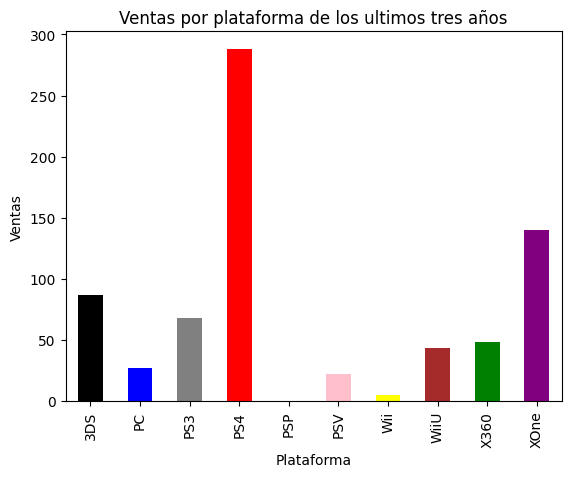

In [22]:
ventas_recientes = games_new.groupby('platform')['ventas_totales'].sum()
print(ventas_recientes)
ventas_recientes.plot(title='Ventas por plataforma de los ultimos tres años', xlabel='Plataforma', ylabel='Ventas', kind='bar', color=['black', 'blue', 'grey', 'red', 'orange', 'pink', 'yellow', 'brown', 'green', 'purple'])
plt.show()

Podemos observar en los datos que en los últimos años las plataformas más vendidas son las que tienen fechas de estreno más recientes, al igual que juegos con fecha de estreno más reciente. A menos que una nueva plataforma se estrene en el próximo año (2017), la tendencia debería ser la misma.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Buen trabajo obtenienod la gráfica por plataforma. Para este tipo de visualizaciones es mejor si lo ordenas por tamaño de las barras y no por orden alfabetico, esto facilitará la comparación entre cada categoria

</div>

#### Diagrama de caja para las ventas globales por plataforma

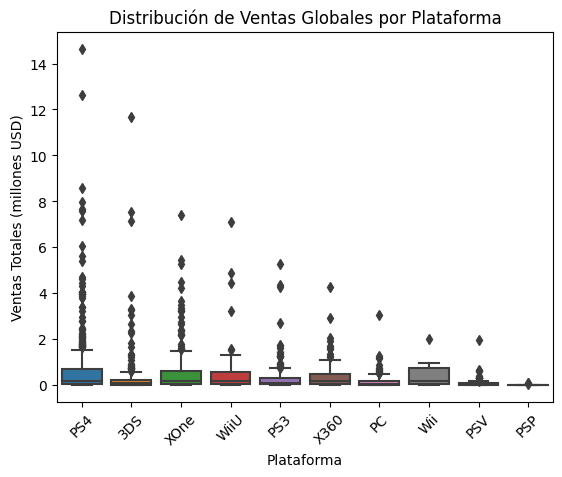

In [23]:
sns.boxplot(data=games_new, x='platform', y='ventas_totales')
plt.xticks(rotation=45)
plt.title('Distribución de Ventas Globales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (millones USD)')
plt.show()

La diferencia de las ventas entre algunas plataformas son bastante significativas aunque podemos ver qué plataformas como la 3ds tiene un pico de ventas que no es consistente y plataformas como la xone y la wiiu tiene medias muy similares y medias más consistentes aunque el gráfico los ponga después de la 3ds.

La plataforma que voy a usar es PS4 que es la plataforma más popular. La voy a usar para hacer el análisis de cómo afectan las reseñas en la venta.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Muy buen trabajo obteniendo los *box-plot*. Estos muestran que la mayoría de los juegos tienen ventas bajas, hay valores extremos que dominan en cada plataforma. Esto muestra que el éxito de un juego no depende solo de la consola, sino también de su popularidad y estrategia de marketing.

</div>

#### ¿Como afectan las reseñas de los usuarios las ventas de la PS4?

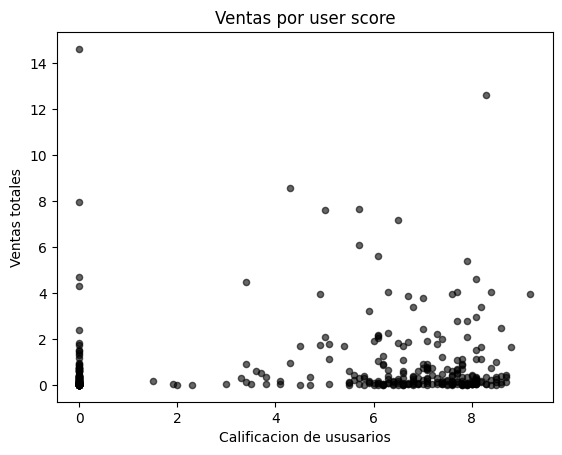

In [24]:
score_ps4 = games_new[games_new['platform']=='PS4'].copy()
score_ps4.plot(kind='scatter', x='user_score', y='ventas_totales', title='Ventas por user score', alpha=0.6, xlabel='Calificacion de ususarios', ylabel='Ventas totales', color='black')
plt.show()

#### ¿Como afectan las critas de los profesionales las ventas?

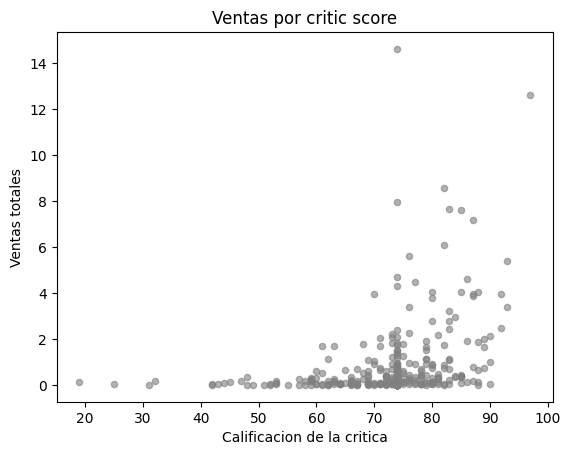

In [25]:
score_ps4.plot(kind='scatter', x='critic_score', y='ventas_totales', title='Ventas por critic score', alpha=0.6, xlabel='Calificacion de la critica', ylabel='Ventas totales', color='grey')
plt.show()

Podemos concluir que los juegos con las mejores críticas en los dos casos suelen tener mejores ventas. Tenemos una variación en los datos de usuarios, ya que muchos de los usuarios no dieron ninguna calificación.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Acá puedes ver cómo tu análisis se distorsiona producto del manejo en los datos faltantes de la columna *user_score* que hiciste más arriba. Si calculamos la correlación entre variables con funciones como `corr()`, el valor que se obtendrá se verá afectado por la presencia de los 0 que incluiste.



</div>

#### Ventas de los mismos juegos en multiplataforma

                        name platform  year_of_release    genre  na_sales  \
0  Call of Duty: Black Ops 3      PS4             2015  Shooter      6.03   
1  Call of Duty: Black Ops 3     XOne             2015  Shooter      4.59   
2  Call of Duty: Black Ops 3     X360             2015  Shooter      1.14   
3  Call of Duty: Black Ops 3      PS3             2015  Shooter      0.49   
4  Call of Duty: Black Ops 3       PC             2015  Shooter      0.00   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0      5.86      0.36         2.38          74.0         0.0    NaN   
1      2.11      0.01         0.68          74.0         0.0    NaN   
2      0.40      0.00         0.16          74.0         0.0    NaN   
3      0.87      0.07         0.26          74.0         0.0    NaN   
4      0.25      0.00         0.01          74.0         0.0    NaN   

   ventas_totales  
0           14.63  
1            7.39  
2            1.70  
3            1.69  
4         

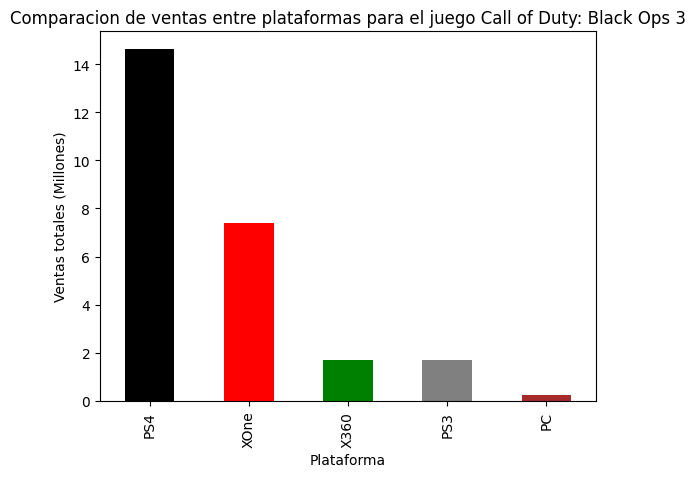

In [27]:
game_multi_plat = games_new[games_new['name']=='Call of Duty: Black Ops 3'].reset_index(drop=True)
print(game_multi_plat)
game_multi_plat.plot(x='platform', y='ventas_totales', kind='bar', title='Comparacion de ventas entre plataformas para el juego Call of Duty: Black Ops 3', xlabel='Plataforma', ylabel='Ventas totales (Millones)', color=['black', 'red', 'green', 'grey', 'brown'])
plt.legend().remove()
plt.show()

El juego con más ventas totales es Call of Duty: Black Ops 3 y, como podemos ver, al igual que pasa con las plataformas PS4 es la más vendida.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>


Buen trabajo analizando los juegos multiplataformas, con esta información es posible relacionar los juegos con mayor popularidad y las plataformas más comercializadas. 
</div>

#### Distribucion de juegos por genero

In [28]:
games_genre =  games_new['genre'].value_counts()
print(games_genre)

Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: genre, dtype: int64


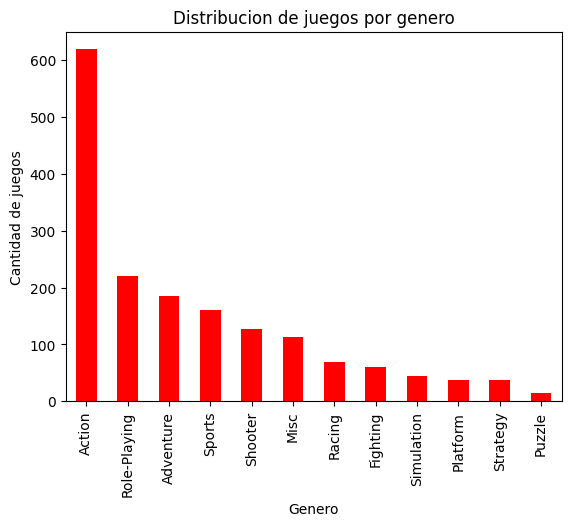

In [29]:
games_genre.plot(kind='bar', title='Distribucion de juegos por genero', xlabel='Genero', ylabel='Cantidad de juegos', color='red')
plt.show()

In [30]:
genre_sales = games_new.groupby('genre')['ventas_totales'].agg(['sum', 'mean', 'median', 'count'])
print('Ventas totales por genero')
print(genre_sales)

Ventas totales por genero
                 sum      mean  median  count
genre                                        
Action        199.36  0.322068   0.090    619
Adventure      17.55  0.094865   0.030    185
Fighting       28.22  0.470333   0.125     60
Misc           37.55  0.332301   0.090    113
Platform       18.09  0.476053   0.140     38
Puzzle          2.21  0.157857   0.045     14
Racing         27.52  0.398841   0.090     69
Role-Playing  101.44  0.459005   0.110    221
Shooter       170.94  1.335469   0.515    128
Simulation     13.13  0.298409   0.100     44
Sports        109.48  0.680000   0.180    161
Strategy        3.96  0.107027   0.060     37


Como podemos observar, los géneros más rentables también son los géneros que cuentan con más distribución de juegos. Esto puede decir mucho sobre los géneros menos vendidos, que también son los géneros que cuentan con menos juegos disponibles.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Excelente trabajo! Se ve claramente que los juegos de acción lideran el mercado

</div>

## Paso 4: Crea un perfil de usuario pata cada region.

#### Las 5 plataformas mas populares de cada region.

In [31]:
plat_na = games_new.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head()
print('Ventas por plataforma en NA')
print('Ventas totales de la region', games_new['na_sales'].sum())
print(plat_na)
print()
plat_eu = games_new.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head()
print('Ventas por plataforma en EU')
print('Ventas totales de la region', games_new['eu_sales'].sum())
print(plat_eu)
plat_jp = games_new.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head()
print('Ventas por plataforma en JP')
print('Ventas totales de la region', games_new['jp_sales'].sum())
print(plat_jp)

Ventas por plataforma en NA
Ventas totales de la region 284.06000000000006
platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
Name: na_sales, dtype: float64

Ventas por plataforma en EU
Ventas totales de la region 270.67999999999995
platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
Name: eu_sales, dtype: float64
Ventas por plataforma en JP
Ventas totales de la region 93.09
platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
Name: jp_sales, dtype: float64


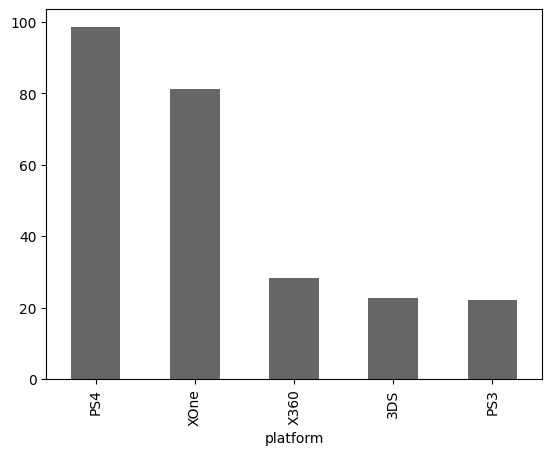

In [32]:
plat_na.plot(kind='bar', alpha=0.6, color='black')
plt.show()

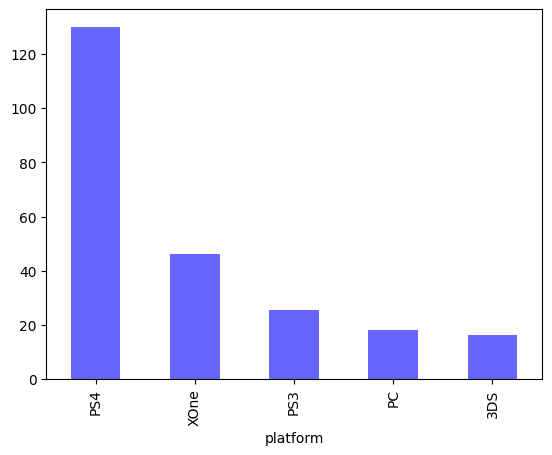

In [33]:
plat_eu.plot(kind='bar', alpha=0.6, color='blue')
plt.show()

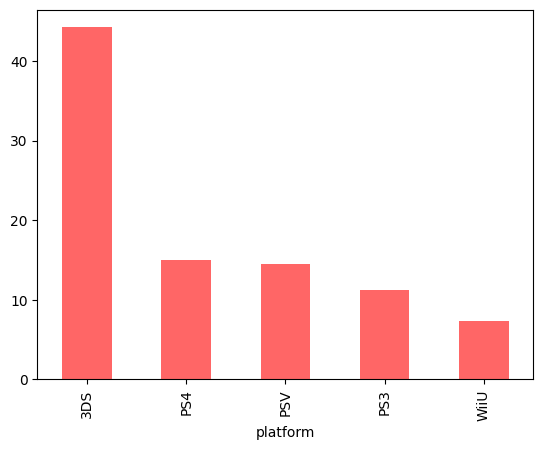

In [34]:
plat_jp.plot(kind='bar', alpha=0.6, color='red')
plt.show()

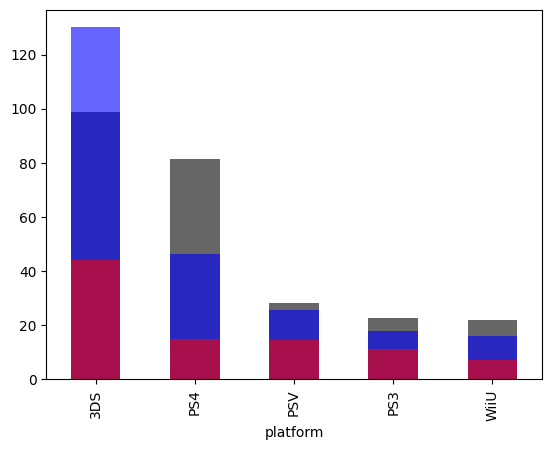

In [35]:
plat_na.plot(kind='bar', alpha=0.6, color='black')
plat_eu.plot(kind='bar', alpha=0.6, color='blue')
plat_jp.plot(kind='bar', alpha=0.6, color='red')
plt.show()

Podemos observar que las ventas entre cada área suelen tener los patrones de ventas muy parecidos, pero hay una gran demanda de 3DS en las ventas de jp esto dispara las ventas en esta región, aunque las ventas totales son bastante menores a comparación de las otras dos regiones, en las otras dos la plataforma que predomina es la PS4 y sus ventas totales son bastante similares, podríamos intentar impulsar las otras plataformas en jp, ya que sus ventas de estas son muy inferiores

#### Los 5 generos principales.

In [36]:
genre_na = games_new.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head()
print('Ventas por genero en NA')
print('Ventas totales de la region', games_new['na_sales'].sum())
print(genre_na)
print()
genre_eu = games_new.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head()
print('Ventas por genero en EU')
print('Ventas totales de la region', games_new['eu_sales'].sum())
print(genre_eu)
print()
genre_jp = games_new.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head()
print('Ventas por genero en JP')
print('Ventas totales de la region', games_new['jp_sales'].sum())
print(plat_jp)

Ventas por genero en NA
Ventas totales de la region 284.06000000000006
genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Name: na_sales, dtype: float64

Ventas por genero en EU
Ventas totales de la region 270.67999999999995
genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Name: eu_sales, dtype: float64

Ventas por genero en JP
Ventas totales de la region 93.09
platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
Name: jp_sales, dtype: float64


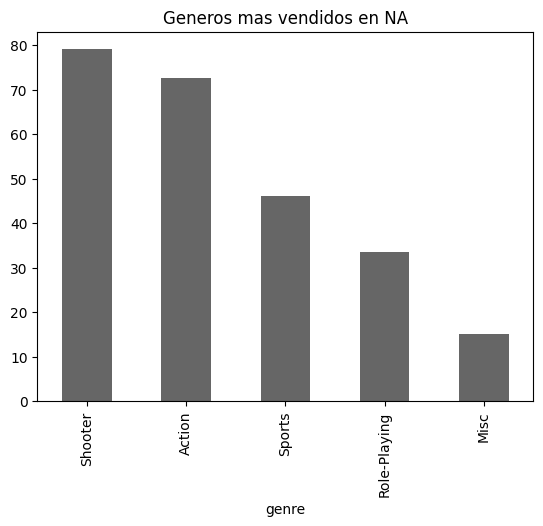

In [37]:
genre_na.plot(kind='bar', alpha=0.6, color='black', title='Generos mas vendidos en NA')
plt.show()

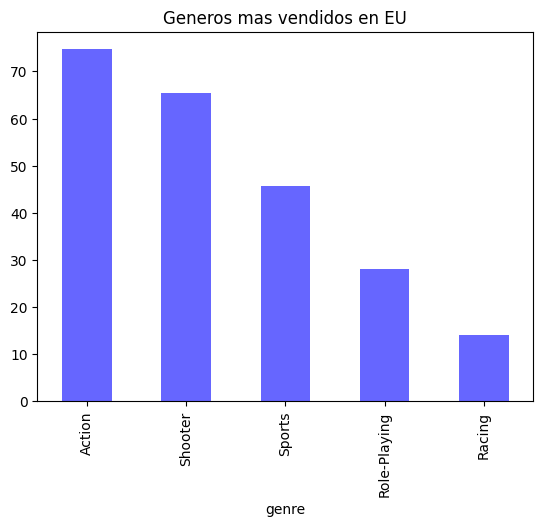

In [38]:
genre_eu.plot(kind='bar', alpha=0.6, color='blue', title='Generos mas vendidos en EU')
plt.show()

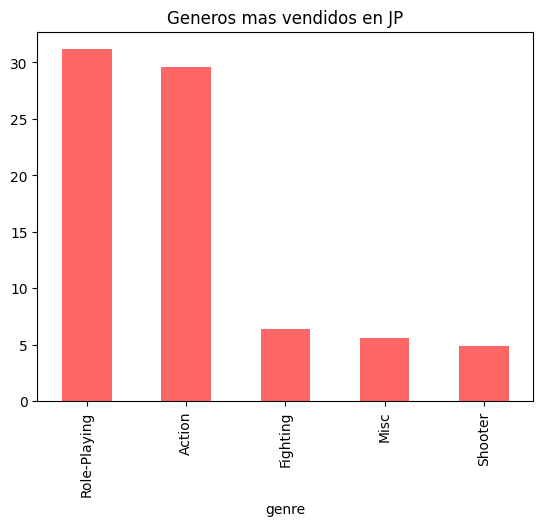

In [39]:
genre_jp.plot(kind='bar', alpha=0.6, color='red', title='Generos mas vendidos en JP')
plt.show()

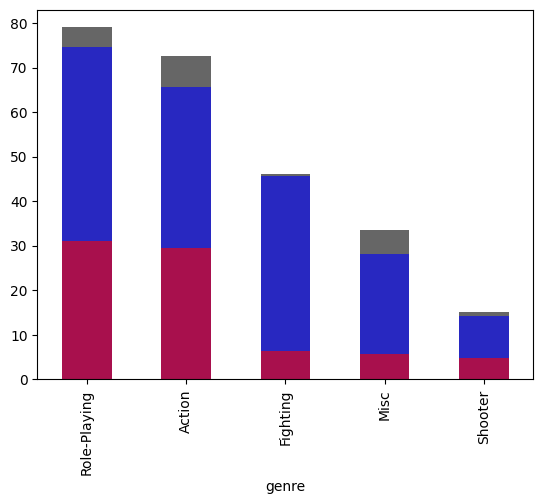

In [40]:
genre_na.plot(kind='bar', alpha=0.6, color='black')
genre_eu.plot(kind='bar', alpha=0.6, color='blue')
genre_jp.plot(kind='bar', alpha=0.6, color='red')
plt.show()

Los géneros más vendidos varían mucho entre cada región es muy difícil saber cuál juego será tendencia solamente por el género es necesario un estudio más grande para poder predecir que genero será exitoso en las tres regiones, pero se podría generar un conjunto de juegos con los géneros más recurrentes en las tres regiones como pueden ser role-playing o shooter.

#### ¿Las clasificaciones ESRB afectan las ventas?

In [41]:
print("Clasificaciones ESRB disponibles:")
print(games_new['rating'].value_counts())
print(f"\nTotal de juegos con clasificación: {games_new['rating'].notna().sum()}")
print(f"Juegos sin clasificación: {games_new['rating'].isna().sum()}")

Clasificaciones ESRB disponibles:
T       271
M       265
E       219
E10+    185
Name: rating, dtype: int64

Total de juegos con clasificación: 940
Juegos sin clasificación: 749


In [42]:
#Revise el rating usado en internet y se usa RP para juegos no clasificados
games_new['rating'] = games_new['rating'].fillna('RP')
print(games_new['rating'].isna().sum())
print(games_new['rating'].value_counts())

0
RP      749
T       271
M       265
E       219
E10+    185
Name: rating, dtype: int64


In [43]:
rating_games_na = games_new.groupby('rating')['na_sales'].sum()
print('Ventas totales en (Millones) por clasificacion en NA')
print(rating_games_na)
print()
rating_games_eu = games_new.groupby('rating')['eu_sales'].sum()
print('Ventas totales en (Millones) por clasificacion en EU')
print(rating_games_eu)
print()
rating_games_jp = games_new.groupby('rating')['jp_sales'].sum()
print('Ventas totales en (Millones) por clasificacion en JP')
print(rating_games_jp)

Ventas totales en (Millones) por clasificacion en NA
rating
E       50.74
E10+    33.23
M       96.42
RP      64.72
T       38.95
Name: na_sales, dtype: float64

Ventas totales en (Millones) por clasificacion en EU
rating
E       58.06
E10+    26.16
M       93.44
RP      58.95
T       34.07
Name: eu_sales, dtype: float64

Ventas totales en (Millones) por clasificacion en JP
rating
E        8.94
E10+     4.46
M        8.01
RP      56.90
T       14.78
Name: jp_sales, dtype: float64


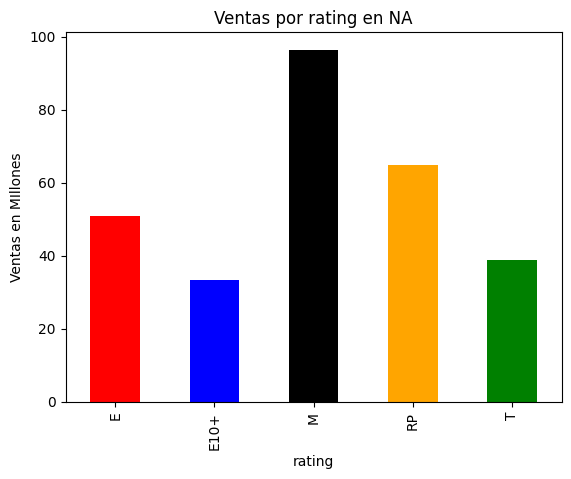

In [44]:
rating_games_na.plot(kind='bar', color=['red', 'blue', 'black', 'orange', 'green'], ylabel='Ventas en MIllones', title='Ventas por rating en NA')
plt.show()

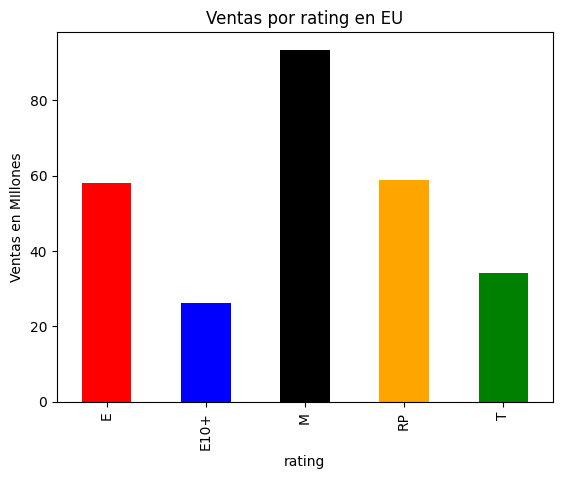

In [45]:
rating_games_eu.plot(kind='bar', color=['red', 'blue', 'black', 'orange', 'green'], ylabel='Ventas en MIllones', title='Ventas por rating en EU')
plt.show()

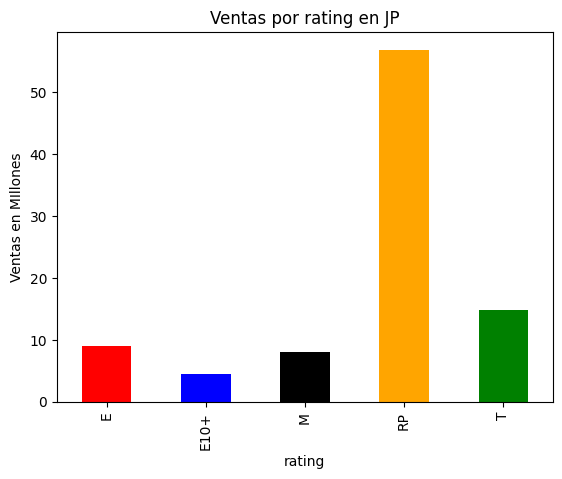

In [46]:
rating_games_jp.plot(kind='bar', color=['red', 'blue', 'black', 'orange', 'green'], ylabel='Ventas en MIllones', title='Ventas por rating en JP')
plt.show()

Es evidente que la mayori de los usuarios prefieren juegos en la categoria M, a ecepcion de JP, en esta region los juegos vendidos no tienen una clasificacion asi que no es posible saber con certeza que genero es el que predomina pero si es evidente que la clasificacion afectan las ventas.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Fercho has logrado identificar claramente las diferencias entre América del Norte, Europa y Japón, no solo en términos de plataformas y géneros predominantes, sino también en la influencia de las clasificaciones ESRB, lo que refleja tu capacidad para conectar datos con tendencias culturales y de comportamiento. 


<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Para lograr un análisis comparativo más efectivo, sería beneficioso presentar cada sección de información empleando un único diagrama de barras. Al asignar un color distintivo a cada región, podremos crear una representación visual unificada que facilite la identificación de patrones y diferencias entre las distintas áreas. Esta consolidación de datos no solo optimizará el espacio visual, sino que también permitirá al lector establecer conexiones y comparaciones de manera más intuitiva y directa entre los distintos conjuntos de información. Acá te muestro un ejemplo 

<img src="https://www.analyticslane.com/storage/2022/06/matplotlib-barras-adyacentes.png.webp" width="400">

</div>
</div>

## Paso 5: Prueba de hipotesis


Hipótesis Nula: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
Hipótesis Alternativa: Las clasificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.

In [47]:
print("Tipo de datos de user_score:")
print(games_new['user_score'].dtype)
print("\nPrimeros valores de score_xbox:")
print(score_xbox.head())
print("Tipo de score_xbox:", score_xbox.dtype)
print("\nPrimeros valores de score_pc:")
print(score_pc.head())
print("Tipo de score_pc:", score_pc.dtype)

Tipo de datos de user_score:
Float64

Primeros valores de score_xbox:


NameError: name 'score_xbox' is not defined

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Ten cuidado en el orden el que creas tus celdas de código, estás usando variables que creas más abajo, lo que te genera un error de ejecución. Cuando trabajamos en notebooks solemos ejecutar las celdas en desorden de acuerdo a cómo vayamos avanzando. No obstante, debemos asegurarnos que no haya errores en al ejecución completa del proyecto. 

Como recomendación, antes de enviar cualquier notebook, siempre selecciona en la barra de herramientas **Kernel** y luego dale en **Restart & Run All Cells**, de esa forma se ejecutarán en orden todas las celdas del notebook y podrás identificar si hay algún error.

<img src="https://digitalhumanities.hkust.edu.hk/wp-content/uploads/2023/08/jupyter-runall-button.png" width="700">

</div>

In [48]:
score_xbox = games_new[games_new['platform']=='XOne']['user_score'].astype(float)
score_pc = games_new[games_new['platform']=='PC']['user_score'].astype(float)

stat, p_value= levene(score_xbox, score_pc)

print(f"Estadístico de Levene: {stat}")
print(f"Valor p: {p_value}")

alpha = 0.05
results = ttest_ind(score_xbox, score_pc, equal_var=False)

print('valor_p:', results.pvalue)
if (results.pvalue < alpha): 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

Estadístico de Levene: 1.0478166128826192
Valor p: 0.30666684786878545
valor_p: 0.31981092459798116
No podemos rechazar la hipótesis nula


Hipótesis Nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
Hipótesis Alternativa:Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.

In [49]:
usuario_accion = games_new[games_new['genre']=='Action']['user_score'].astype(float)
usuario_deportes = games_new[games_new['genre']=='Sports']['user_score'].astype(float)

stat, p_value= levene(usuario_accion, usuario_deportes)

print(f"Estadístico de Levene: {stat}")
print(f"Valor p: {p_value}")

alpha = 0.05
results = ttest_ind(usuario_accion, usuario_deportes, equal_var=False)

print('valor_p:', results.pvalue)
if (results.pvalue > alpha): 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

Estadístico de Levene: 11.573445605707771
Valor p: 0.0007031751129403564
valor_p: 0.0006646333120910831
No podemos rechazar la hipótesis nula


Las dos hipótesis nulas no pueden ser rechazadas, ya que los valores son significativamente similares, los criterios para formular las hipótesis fueron basadas en el punto solicitó(ejemplo:Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.) este criterio se usó para la hipótesis nula por consecuencia se usó lo contrario para la hipótesis alternativa, para probar la hipótesis utilizamos una prueba levene para evaluar la igualdad de las varianzas y después una prueba ttest_ind para verificar si nuestra hipótesis nula puede ser rechazada.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Buen trabajo Fercho! Aplicaste correctamente la prueba de hipótesis comparando la media de muestras independientes e incluiste la prueba de Levene, lo cual es clave para verificar la similitud de las varianzas y garantizar que la *prueba t* sea estadísticamente válida.

</div>

## Paso 6: Conclusión.

Como conclusión general podemos decir que las ventas entre una región y otra varían mucho y dependen de la plataforma y los géneros de los juegos esto hace que las ventas en cada región se disparen en un sentido diferente unas de otras además de que pudimos observar una clara inclinación en todas las regiones a los juegos de rating M esto también puede deberse a la accesibilidad de los juegos para personas mayores de edad y que suelen preferir este tipo de juegos como una observación me gustaría comentar que en la región JP tienen tendencia muy diferentes a las otras tanto en plataforma como en géneros de juegos se podría hacer un estudio dedicado únicamente a esta región para poder determinar porque tiene este caso característico, espero sé esto de ayuda saludos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Lograste sintetizar de forma clara cómo las preferencias por plataformas y géneros varían considerablemente entre regiones, y cómo estas diferencias impactan directamente en las ventas.

</div>